In [6]:
import tensorflow as tf; print('tensorflow version: ', tf.__version__)
import keras; print('keras version: ',keras.__version__)

tensorflow version:  2.2.0
keras version:  2.3.0-tf


Using TensorFlow backend.


In [7]:
import pandas as pd
import numpy as np
import IPython.display as ipd

In [10]:
# parent folder of sound files
INPUT_DIR="../input/heartbeat-sounds/"

In [11]:
!pwd
!ls -all ../input/heartbeat-sounds

/kaggle/working
total 140
drwxr-xr-x 4 nobody nogroup  4096 Jun 13 09:56 .
drwxr-xr-x 3 root   root     4096 Jul  8 17:35 ..
drwxr-xr-x 2 nobody nogroup 12288 Jun 13 09:56 set_a
-rw-r--r-- 1 nobody nogroup  7031 Jun 13 09:56 set_a.csv
-rw-r--r-- 1 nobody nogroup 17115 Jun 13 09:56 set_a_timing.csv
drwxr-xr-x 2 nobody nogroup 45056 Jun 13 09:56 set_b
-rw-r--r-- 1 nobody nogroup 42145 Jun 13 09:56 set_b.csv


In [12]:
#for visuals of file naming conventions
!ls -all ../input/heartbeat-sounds/set_b

total 35044
drwxr-xr-x 2 nobody nogroup  45056 Jun 13 09:56 .
drwxr-xr-x 4 nobody nogroup   4096 Jun 13 09:56 ..
-rw-r--r-- 1 nobody nogroup  84854 Jun 13 09:56 Bunlabelledtest__101_1305030823364_A.wav
-rw-r--r-- 1 nobody nogroup 174298 Jun 13 09:56 Bunlabelledtest__101_1305030823364_D.wav
-rw-r--r-- 1 nobody nogroup  21378 Jun 13 09:56 Bunlabelledtest__101_1305030823364_F.wav
-rw-r--r-- 1 nobody nogroup  57882 Jun 13 09:56 Bunlabelledtest__103_1305031931979_A.wav
-rw-r--r-- 1 nobody nogroup  67516 Jun 13 09:56 Bunlabelledtest__103_1305031931979_C.wav
-rw-r--r-- 1 nobody nogroup  80452 Jun 13 09:56 Bunlabelledtest__105_1305033453095_B.wav
-rw-r--r-- 1 nobody nogroup 123662 Jun 13 09:56 Bunlabelledtest__105_1305033453095_D.wav
-rw-r--r-- 1 nobody nogroup  24382 Jun 13 09:56 Bunlabelledtest__106_1306776721273_B.wav
-rw-r--r-- 1 nobody nogroup  36188 Jun 13 09:56 Bunlabelledtest__106_1306776721273_D.wav
-rw-r--r-- 1 nobody nogroup  74046 Jun 13 09:56 Bunlabelledtest__107_1305654946865_B.w

# Basic Data Scoping
Gaining a sense of basic properties such as size, distribution, etc.

In [13]:
set_a=pd.read_csv(INPUT_DIR+"set_a.csv")
set_a.head()

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [14]:
set_a.label.describe()

count          124
unique           4
top       artifact
freq            40
Name: label, dtype: object

In [15]:
set_b=pd.read_csv(INPUT_DIR+"set_b.csv")
set_b.head()

,dataset,fname,label,sublabel
0,b,set_b/Btraining_extrastole_127_1306764300147_C...,extrastole,NaN
1,b,set_b/Btraining_extrastole_128_1306344005749_A...,extrastole,NaN
2,b,set_b/Btraining_extrastole_130_1306347376079_D...,extrastole,NaN
3,b,set_b/Btraining_extrastole_134_1306428161797_C...,extrastole,NaN
4,b,set_b/Btraining_extrastole_138_1306762146980_B...,extrastole,NaN


In [16]:
set_b.label.describe()

count        461
unique         3
top       normal
freq         320
Name: label, dtype: object

In [17]:
frames = [set_a, set_b]
train_set=pd.concat(frames)
train_set.describe()

,dataset,fname,label,sublabel
count,832,832,585,149
unique,2,832,5,2
top,b,set_a/__201106120928.wav,normal,noisynormal
freq,656,1,351,120


In [18]:
classes=train_set.label.unique()

print("Number of training examples: ", train_set.shape[0])
print("Number of classes: ", len(classes))
print (classes)

Number of training examples:  832
Number of classes:  6
['artifact' 'extrahls' 'murmur' 'normal' nan 'extrastole']


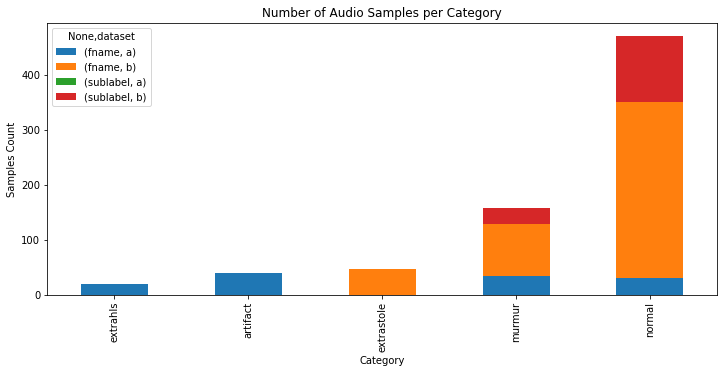

In [19]:
#data distribution
category_group = train_set.groupby(['label','dataset']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(12,5))
plot.set_xlabel("Category")
plot.set_ylabel("Samples Count");

### Toggle function for easier experimentation

In [20]:
def leadingTag(tags, noisy, toggle, sets):
    s = tags[toggle] + "_"
    if noisy:
        s = s + "noisy" + tags[toggle]
    s += "_"
    if sets == "b":
        s = "set_b/" + s
    return s

# Normal Pulse Recordings

In [21]:
noisy = False
tags = ["normal", "murmur", "extrastole", "artifact"]
toggle = 0
sets = 'b'
print(leadingTag(tags, noisy, toggle, sets))

set_b/normal__


In [22]:
#filter for normal sounds in set b
df_b_normal = set_b[set_b.label == "normal"]
df_b_normal.head()

,dataset,fname,label,sublabel
112,b,set_b/Btraining_normal_103_1305031931979_B.wav,normal,NaN
113,b,set_b/Btraining_normal_103_1305031931979_D1.wav,normal,NaN
114,b,set_b/Btraining_normal_103_1305031931979_D2.wav,normal,NaN
115,b,set_b/Btraining_normal_103_1305031931979_D3.wav,normal,NaN
116,b,set_b/Btraining_normal_106_1306776721273_B1.wav,normal,NaN


In [23]:
#filter for clean sounds in set b normal
df_b_normal_clean = df_b_normal[df_b_normal.sublabel != "noisynormal"]
df_b_normal_clean.head()

,dataset,fname,label,sublabel
112,b,set_b/Btraining_normal_103_1305031931979_B.wav,normal,NaN
113,b,set_b/Btraining_normal_103_1305031931979_D1.wav,normal,NaN
114,b,set_b/Btraining_normal_103_1305031931979_D2.wav,normal,NaN
115,b,set_b/Btraining_normal_103_1305031931979_D3.wav,normal,NaN
116,b,set_b/Btraining_normal_106_1306776721273_B1.wav,normal,NaN


### Checking Out Sound

In [64]:
n=1 #select one file to listen
files = np.random.choice(df_b_normal_clean.fname, n)
print(files[0])
s=files[0]
#e.g. set_b/Btraining_normal_179_1307990076841_D.wav

start = s.find("normal_")+len("normal_")
filename = leadingTag(tags, noisy, toggle, sets) + s[start:]
normal_file=INPUT_DIR+filename
print(normal_file)

set_b/Btraining_normal_170_1307970562729_B.wav
../input/heartbeat-sounds/set_b/normal__170_1307970562729_B.wav


##### Reading Audio

In [73]:
import librosa
x, sr = librosa.load(normal_file)
print(x.shape)
print(sr)

(168192,)
22050


##### Visualizing Audio

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

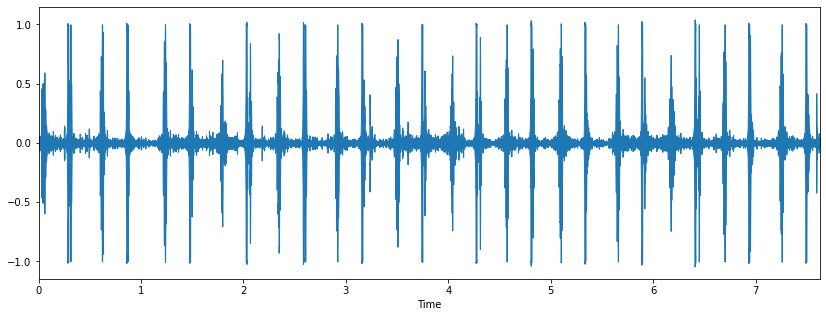

In [75]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

##### Hearing Audio

In [76]:
import IPython.display as ipd
ipd.Audio(normal_file)

# Basic Signal Processing

### Detecting Onsets
from https://librosa.org/librosa/master/generated/librosa.onset.onset_detect.html

In [77]:
import librosa

In [90]:
y=x
t_seconds = librosa.get_duration(y, sr)
print(y[:50])
print(sr)
print(t_seconds)

[-0.04388865 -0.04732133 -0.04808776 -0.04646404 -0.04310275 -0.03889844
 -0.03481242 -0.03169316 -0.03012906 -0.03036135 -0.03227074 -0.0354353
 -0.03924183 -0.04302336 -0.04619161 -0.04833791 -0.04928488 -0.04908427
 -0.04796867 -0.04627468 -0.04435863 -0.04252565 -0.04098658 -0.03984779
 -0.03913014 -0.03880598 -0.03883963 -0.03921735 -0.03995798 -0.04110188
 -0.04268294 -0.044694   -0.04705773 -0.04961411 -0.05213037 -0.05433348
 -0.05595859 -0.05680234 -0.05676806 -0.0558911  -0.0543379  -0.05237725
 -0.05032973 -0.0485053  -0.0471428  -0.04636328 -0.04614707 -0.04633875
 -0.04667873 -0.04685446]
22050
7.627755102040816


In [79]:
onset_frames = librosa.onset.onset_detect(y, sr=sr)
librosa.frames_to_time(onset_frames, sr=sr)

array([0.06965986, 0.30185941, 0.510839  , 0.62693878, 0.88235828,
       1.25387755, 1.4860771 , 1.81115646, 2.04335601, 2.20589569,
       2.34521542, 2.60063492, 2.92571429, 3.18113379, 3.27401361,
       3.50621315, 3.76163265, 4.06349206, 4.17959184, 4.29569161,
       4.57433107, 4.82975057, 5.10839002, 5.34058957, 5.66566893,
       5.89786848, 6.17650794, 6.43192744, 6.71056689, 6.94276644,
       7.2678458 , 7.50004535, 7.61614512])

In [80]:
onset_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sr)

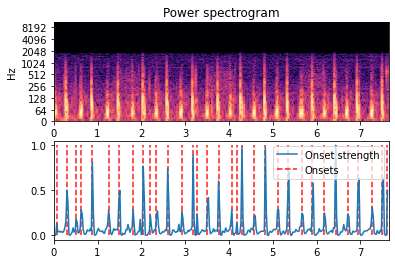

In [82]:
import matplotlib.pyplot as plt
D = np.abs(librosa.stft(y))
plt.figure()
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(times, onset_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)
plt.show()

Note that we can see fairly distinguished peaks for both S1 and S2 above, yet the onsets are messy and no consistent trends are visualizable since the recording is not perfectly clean.

In [100]:
# tempo, beats = librosa.beat.beat_track(y, sr=sr)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
# print(beats)
print("Heart Rate: ", int(tempo), "BPM")

Heart Rate:  112 BPM


### Visualizing "Dub"s

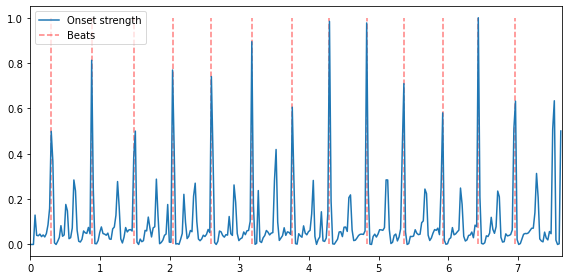

In [92]:
import matplotlib.pyplot as plt
hop_length = 512
plt.figure(figsize=(8, 4))
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.legend(frameon=True, framealpha=0.75)

# Limit the plot to length of clip
plt.xlim(0, t_seconds)
plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()
plt.show()

Here we made use of the tempo feature to clearly identify heart rate by pinpointing S2s. This enables us to correctly account for softer sounds such as the two found between 0s and 1s.